<div style="border-radius:10px; padding: 15px; background-color: #EFEDF8; font-size:120%; text-align:left">

<h1 align="center"><font color=orange> Estadística de suicidios en Argentina.</font></h1>


---
<h2 align="right" style="font-size: 25px; color: black;"> Víctor Nuñez</h2>
<h2 align="right" style="font-size: 25px; color: black;"> Creditos por los datos: Julio Torres</h2>

<a id="libraries"></a>
# <b><span style="color:orange;"> ◼️ Step 1 |</span><span style='color:#hdc388'> Librerias</span></b>

In [62]:
# Data
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

<a id="data"></a>
# <b><span style="color:orange;"> ◼️ Step 2 |</span><span style='color:#hdc388'> Los datos</span></b>

In [43]:
df_1 = pd.read_csv('SuicidiosArg.csv')

In [77]:
print('df_1 shape:', df_1.shape)

df_1 shape: (20792, 19)


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20792 entries, 0 to 20791
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_hecho             20792 non-null  int64 
 1   provincia_id         20792 non-null  int64 
 2   provincia_nombre     20792 non-null  object
 3   departamento_id      20792 non-null  int64 
 4   departamento_nombre  20792 non-null  object
 5   localidad_id         20792 non-null  int64 
 6   localidad_nombre     20792 non-null  object
 7   año                  20792 non-null  int64 
 8   mes                  20792 non-null  int64 
 9   dias                 20792 non-null  int64 
 10  hora                 20792 non-null  int64 
 11  tipo_lugar           20792 non-null  object
 12  modalidad            20792 non-null  object
 13  suicida_sexo         20792 non-null  object
 14  suicida_edad         20792 non-null  object
 15  país                 20792 non-null  object
 16  depa

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   provincia_nombre        532 non-null    object 
 1   Departamento            532 non-null    object 
 2   Casos                   532 non-null    int64  
 3   Porcentaje Nacion(%)    532 non-null    float64
 4   Lugar                   532 non-null    object 
 5   Lugar(#)                532 non-null    int64  
 6   Lugar(%)                532 non-null    float64
 7   Modalidad               532 non-null    object 
 8   Modalidad(#)            532 non-null    int64  
 9   Modalidad(%)            532 non-null    float64
 10  Masculino(#)            529 non-null    float64
 11  Masculino(%)            529 non-null    float64
 12  Femenino(#)             532 non-null    float64
 13  Femenino(%)             532 non-null    float64
 14  Intervalo de Tiempo     532 non-null    ob

In [44]:
df_1.rename(columns={'id_hecho':'casos', 'suicida_sexo':'sexo','suicida_edad':'grupo_edad'}, inplace =  True)

<a id="análisis"></a>
# <b><span style="color:orange;"> ◼️ Step 3 |</span><span style='color:#hdc388'> Análisis</span></b>

In [127]:
print('Casos Totales: ', df_1['casos'].count())

Casos Totales:  20792


In [128]:
print('Casos de hombres:',df_1['casos'][df_1['sexo']=='Masculino'].count())

Casos de hombres: 16476


In [129]:
print('Casos de mejeres:',df_1['casos'][df_1['sexo']=='Femenino'].count())

Casos de mejeres: 4316


In [134]:
#Por cada 100.000 habitantes, año 2022
casos_totales_2022 = df_1['casos'][df_1['año'] == 2022].count()
poblacion_estimada = 46E6

casos_por_100mil = (casos_totales_2022/poblacion_estimada)*100E3
print('Suicidios por cada 100.000 habitantes (2022)', round(casos_por_100mil,2))


Suicidios por cada 100.000 habitantes (2022) 8.23


**Distribución de Casos de Suicidio por Grupo de Edad**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

In [37]:
x = df_1.groupby('grupo_edad')['casos'].size()
casos_edad = pd.DataFrame({'casos':x.values, 'edad':x.index})

def calcular_valor_medio(edad_str):
    rango = [int(x) for x in edad_str.split('-')]
    return sum(rango) / len(rango)

# Agregar una columna con el valor medio de cada rango de edad
casos_edad['Valor Medio'] = casos_edad['edad'].apply(calcular_valor_medio)

# Ordenar el DataFrame por el valor medio de los rangos de edad
casos_edad = casos_edad.sort_values(by='Valor Medio')
casos_edad.head()

,casos,edad,Valor Medio
9,13,5-9,7.0
1,371,10-14,12.0
2,2335,15-19,17.0
3,2981,20-24,22.0
4,2576,25-29,27.0


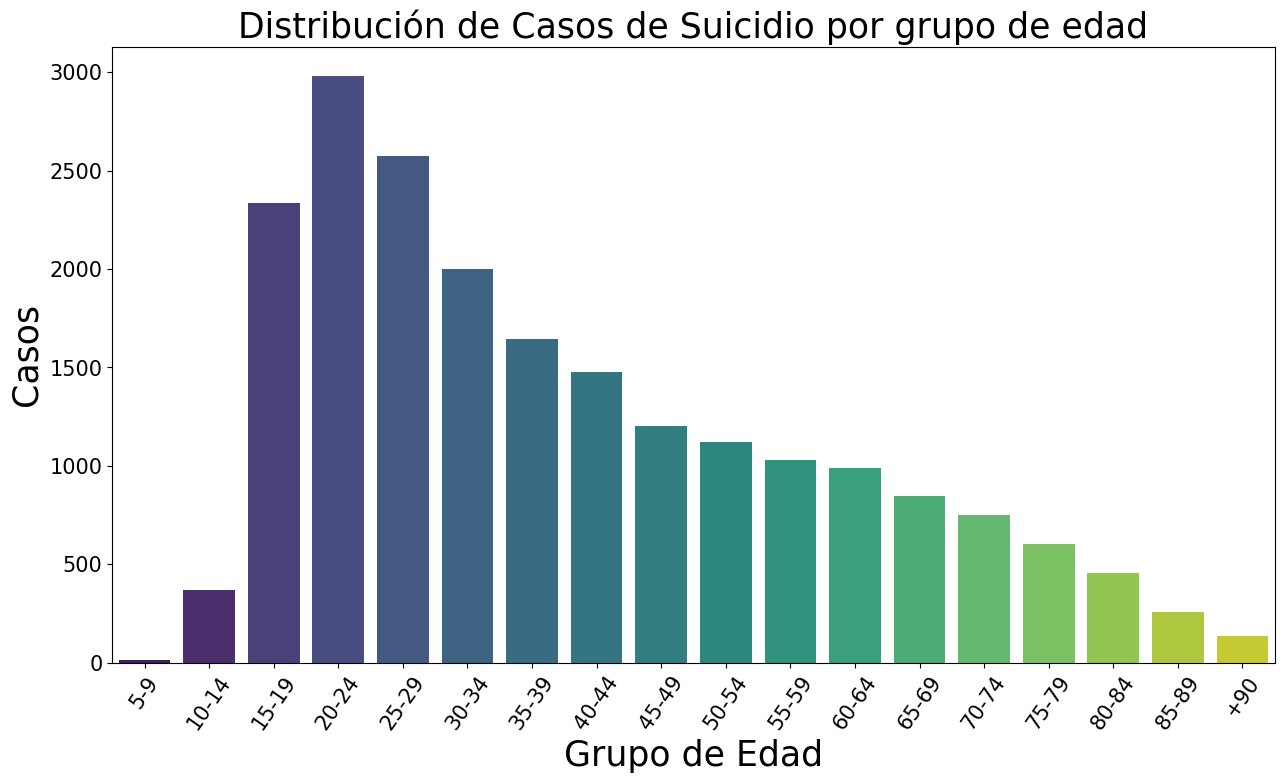

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(x='edad', y='casos', data=casos_edad, palette='viridis')
plt.title('Distribución de Casos de Suicidio por grupo de edad', fontsize = 25)
plt.xlabel('Grupo de Edad', fontsize = 25 )
plt.ylabel('Casos', fontsize = 25)
plt.xticks(rotation=55, fontsize = 15)
plt.yticks(fontsize = 15);

**Tendencia Temporal**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

In [39]:
casos_sexo_año = df_1.groupby(['año','sexo'])['casos'].size().to_frame().reset_index()
casos_sexo_año

,año,sexo,casos
0,2017,Femenino,697
1,2017,Masculino,2462
2,2018,Femenino,752
3,2018,Masculino,2999
4,2019,Femenino,686
5,2019,Masculino,2771
6,2020,Femenino,626
7,2020,Masculino,2507
8,2021,Femenino,731
9,2021,Masculino,2777


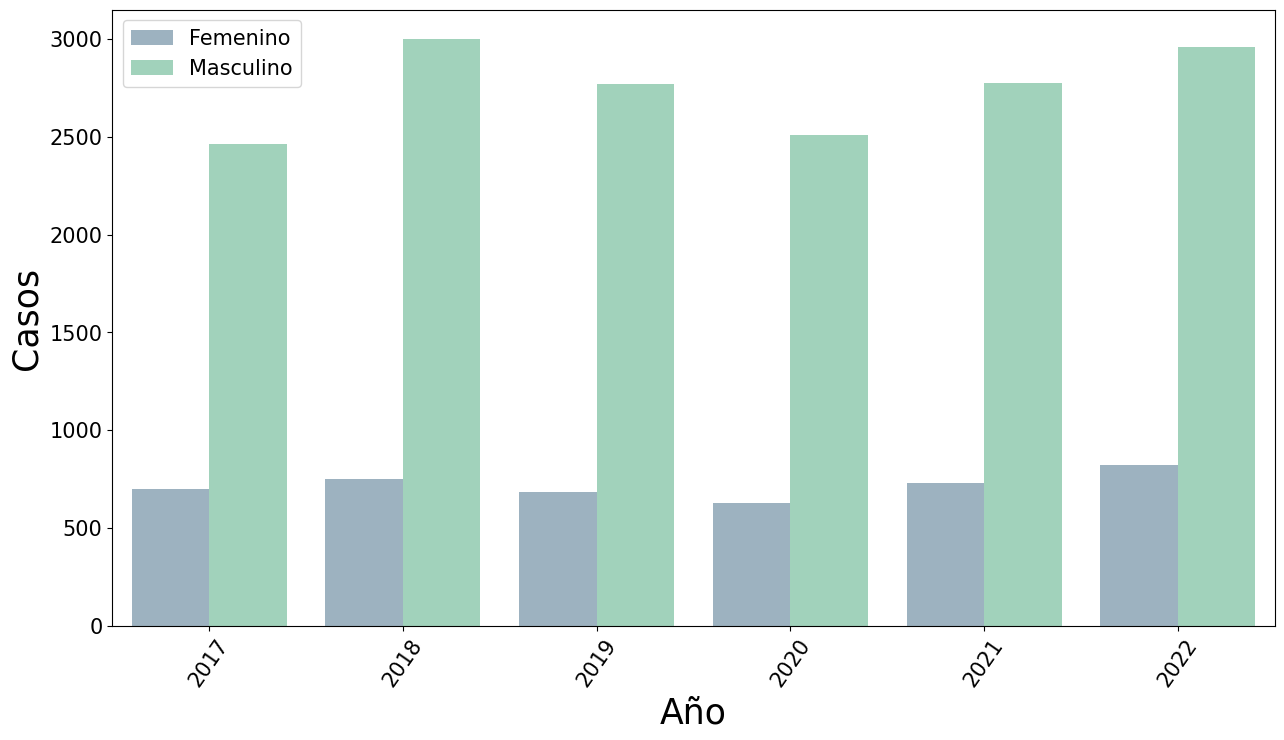

In [40]:
plt.figure(figsize=(15, 8))

# Crear el gráfico de líneas
#sns.lineplot(x='año', y='casos', hue='sexo', data=casos_sexo_año, palette='viridis', legend=False)

# Crear el gráfico de barras
sns.barplot(x='año', y='casos', hue='sexo', data=casos_sexo_año, palette='viridis', alpha=0.5)
plt.xlabel('Año', fontsize=25)
plt.ylabel('Casos', fontsize=25)
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15);

**Impacto del intervalo de tiempo**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

In [45]:
#map número del mes a nombre del mes
df_1.rename(columns={'mes':'num_mes'}, inplace = True)
def numero_a_mes(numero):
    meses = {
        1: "enero",
        2: "febrero",
        3: "marzo",
        4: "abril",
        5: "mayo",
        6: "junio",
        7: "julio",
        8: "agosto",
        9: "septiembre",
        10: "octubre",
        11: "noviembre",
        12: "diciembre"
    }
    return meses.get(numero)

df_1['mes'] = df_1['num_mes'].apply(numero_a_mes)


In [46]:
casos_mes_año = df_1.groupby(['año', 'mes', 'num_mes'])['casos'].size().to_frame().reset_index()
casos_mes_año = casos_mes_año.sort_values(by= 'num_mes')

In [48]:
casos_mes_año['mes']= casos_mes_año['mes'].apply(lambda x: x.capitalize())

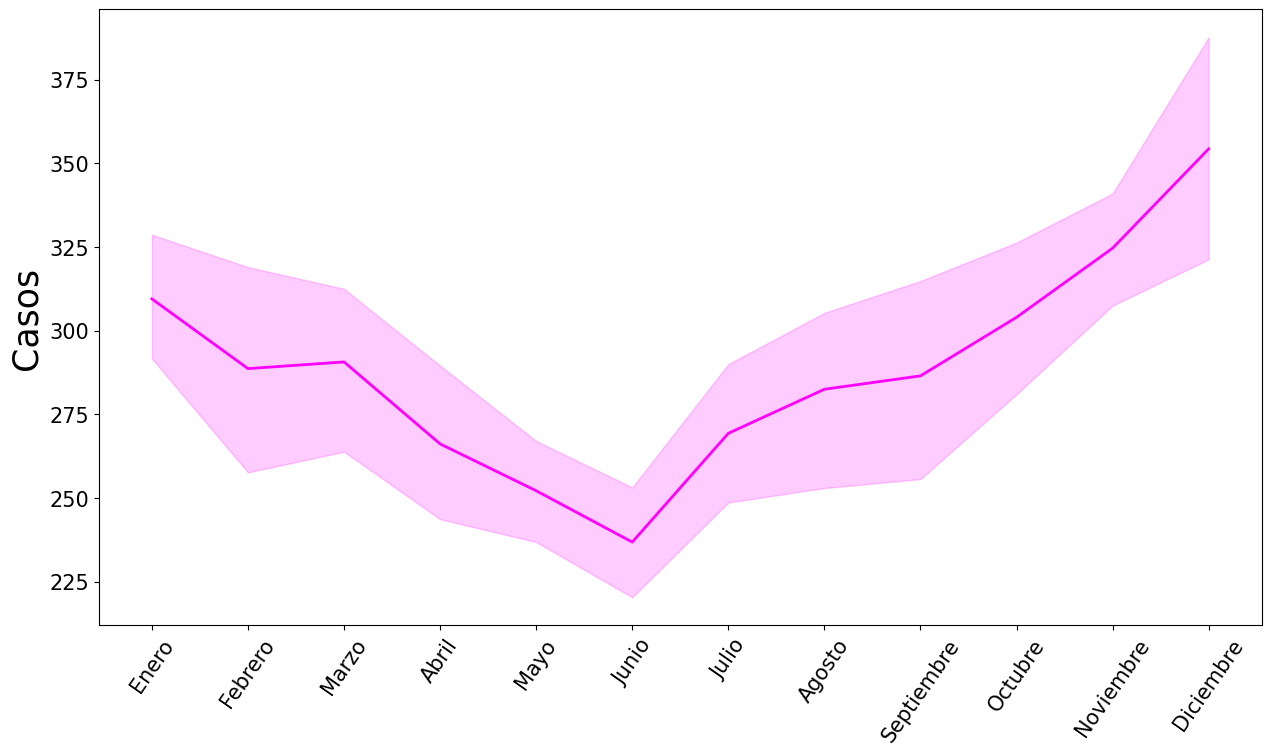

In [51]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='mes', y='casos', data=casos_mes_año, color='magenta', linewidth=2 )
plt.xlabel(None)
plt.ylabel('Casos', fontsize=25)
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize=15);

**Casos por provincia, diagrama de Pareto**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

In [52]:
df_1['provincia_nombre'] = df_1['provincia_nombre'].replace('CIUDAD AUTONOMA DE BUENOS AIRES','BUENOS AIRES')
df_1['provincia_nombre'] = df_1['provincia_nombre'].apply(lambda x: x.lower().capitalize())
df_1['provincia_nombre'] = df_1['provincia_nombre'].replace('Buenos aires','Buenos Aires')

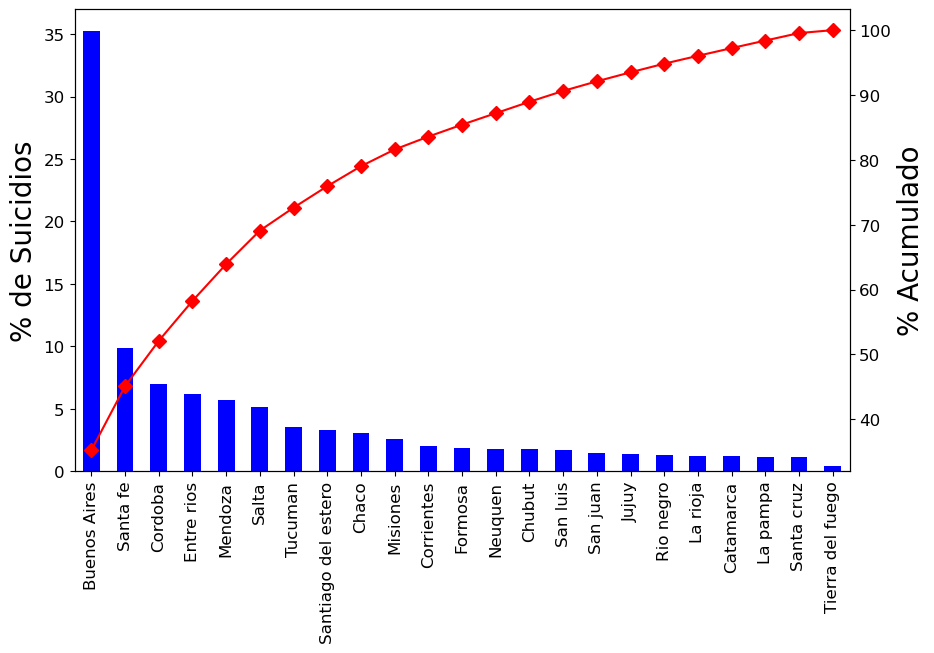

In [63]:
# Número total de suicidios en cada provincia
suicidios_por_provincia = df_1.groupby('provincia_nombre')['casos'].count()

# Porcentaje de suicidios que representa cada provincia con respecto al total nacional
porcentaje_suicidios_por_provincia = suicidios_por_provincia / suicidios_por_provincia.sum() * 100

# Ordenar las provincias en función de su contribución al porcentaje total de suicidios de mayor a menor
porcentaje_suicidios_por_provincia = porcentaje_suicidios_por_provincia.sort_values(ascending=False)

# Calcular la contribución acumulativa al porcentaje total de suicidios
porcentaje_acumulado = porcentaje_suicidios_por_provincia.cumsum()

# Crear el diagrama de Pareto
plt.figure(figsize=(10, 6))
porcentaje_suicidios_por_provincia.plot(kind='bar', color='blue')
plt.ylabel('% de Suicidios', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel(None)
plt.yticks(fontsize=12)
plt.twinx()
porcentaje_acumulado.plot(color='red', marker='D', ms=7)
plt.ylabel('% Acumulado', fontsize=20 )
plt.yticks(fontsize=12)
plt.grid(False)
#plt.savefig('Suicidios_Provincias_.png', transparent=True, bbox_inches='tight', pad_inches=0.2)

**Modalidad del suicidio**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

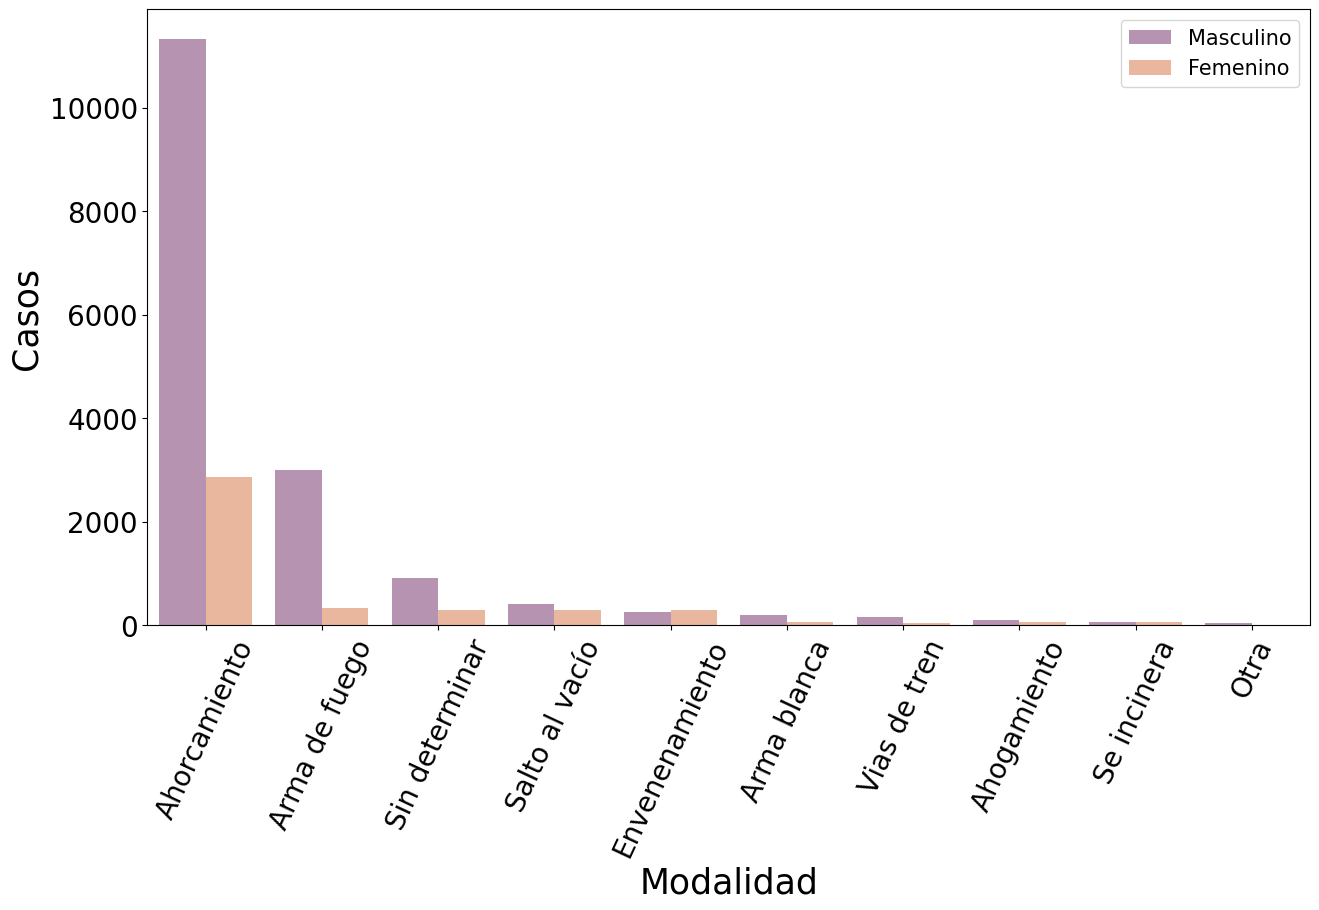

In [123]:
casos_modalidad = df_1.groupby(['modalidad', 'sexo'])['casos'].size()\
                                                              .to_frame()\
                                                              .reset_index()
casos_modalidad = casos_modalidad.sort_values(by='casos', ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(data = casos_modalidad, x = 'modalidad', y = 'casos', hue = 'sexo', 
            palette='inferno', alpha = 0.5)
plt.xlabel('Modalidad', fontsize=25)
plt.ylabel('Casos', fontsize=25)
plt.xticks(rotation=65, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15);
#plt.savefig('modalidad_.png', transparent=True, bbox_inches='tight', pad_inches=0.2)

**Hora mas frecuente**
<div style="border-radius:10px; padding: 10px; background-color: orange; font-size:50%; text-align:left">

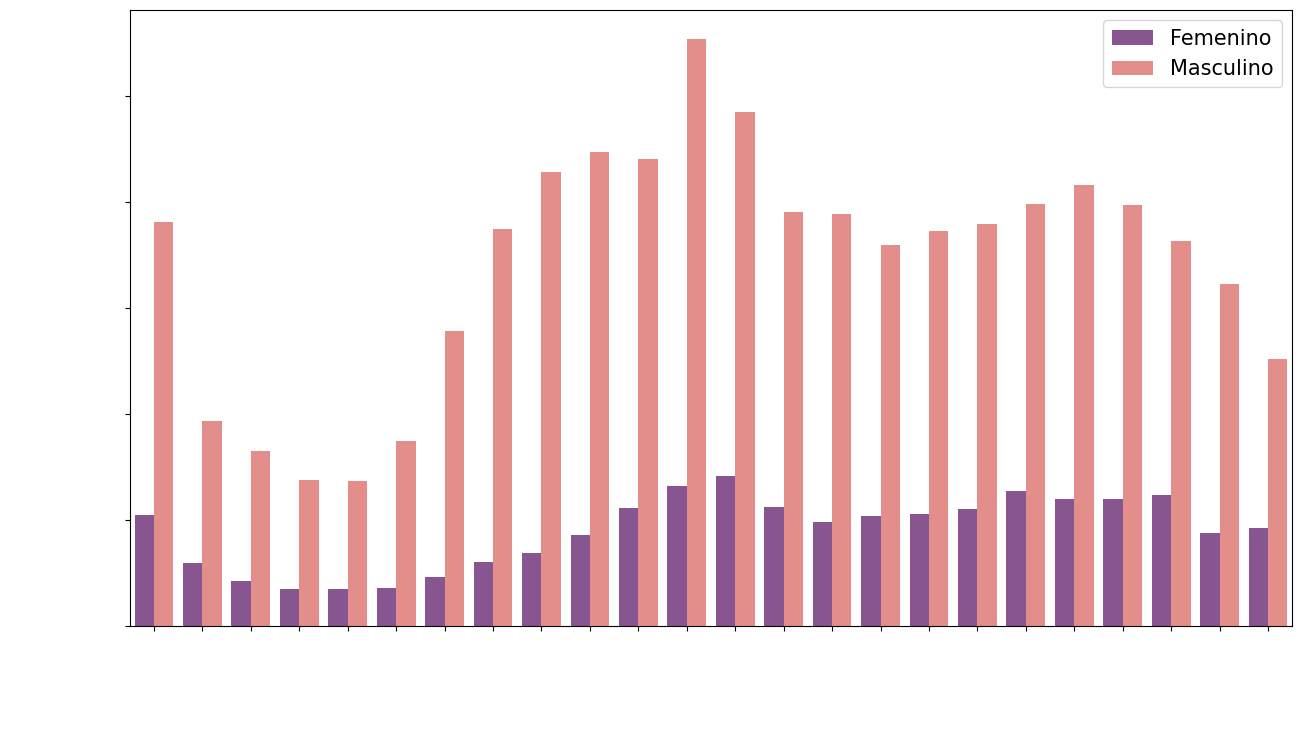

In [118]:
casos_hora = df_1.groupby(['hora','sexo'])['casos']
casos_hora = casos_hora.size().to_frame().reset_index()



plt.figure(figsize=(15, 8))
sns.barplot(data = casos_hora, x = 'hora', y = 'casos', hue = 'sexo', 
            palette='magma', alpha = 0.8)
plt.xlabel('Hora', fontsize=25, color = 'white')
plt.ylabel('Casos', fontsize=25, color = 'white')
plt.xticks(rotation=65, fontsize=20, color = 'white')
plt.yticks(fontsize=20, color = 'white')
plt.legend(fontsize=15)
plt.savefig('hora_.png', transparent=True, bbox_inches='tight', pad_inches=0.2)
